In [1]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
path = r'D:\Project-VSCode\emotion_idenfity\data'

data_gen = ImageDataGenerator(rescale=1./255)

train_data = data_gen.flow_from_directory(
    fr"{path}\train",
    target_size=(128,128),
    batch_size=16,
)

valid_data = data_gen.flow_from_directory(
    fr"{path}\test",
    target_size=(128,128),
    batch_size=16,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
def img_show(train_data):

    angry = []
    disgusted = []
    fearful = []
    happy = []
    neutral = []
    sad = []
    surprised = []
    img_emotion = []

    for i in train_data.filepaths:
        if 'angry' in i:
            angry.append(i)
        elif 'disgusted' in i:
            disgusted.append(i)
        elif 'fearful' in i:
            fearful.append(i)
        elif 'happy' in i:
            happy.append(i)
        elif 'neutral' in i:
            neutral.append(i)
        elif 'sad' in i:
            sad.append(i)
        elif 'surprised' in i:
            surprised.append(i)
        else:
            break

    for i in [angry,disgusted,fearful,happy,neutral,sad,surprised]:
        r = random.randint(1,len(i))
        img = cv2.imread(i[r])
        img_emotion.append(img)

    fig , axs = plt.subplots(1,7,figsize=[13,15])

    axs[0].imshow(img_emotion[0])
    axs[0].set_title('Angry')

    axs[1].imshow(img_emotion[1])
    axs[1].set_title('Disgusted')

    axs[2].imshow(img_emotion[2])
    axs[2].set_title('Fearful')

    axs[3].imshow(img_emotion[3])
    axs[3].set_title('Happy')

    axs[4].imshow(img_emotion[4])
    axs[4].set_title('Neutral')

    axs[5].imshow(img_emotion[5])
    axs[5].set_title('Sad')

    axs[6].imshow(img_emotion[6])
    axs[6].set_title('Surprised')


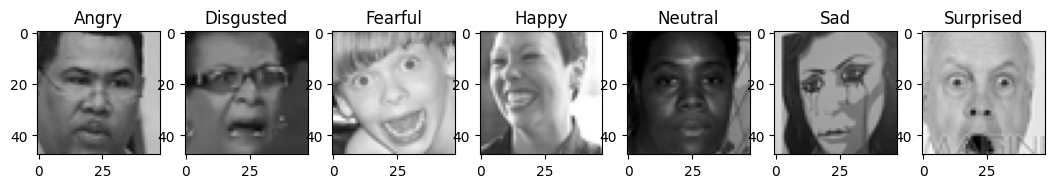

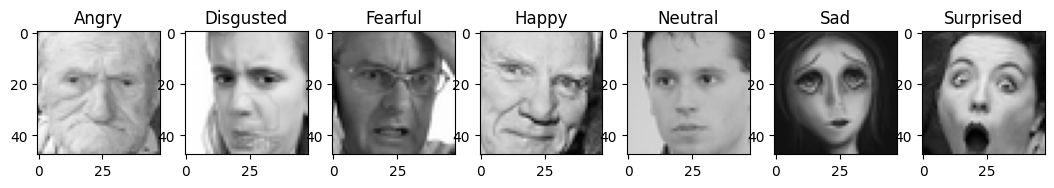

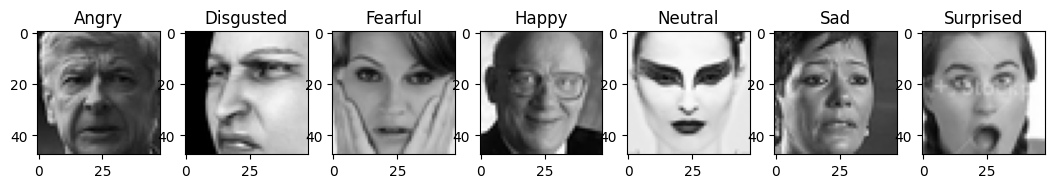

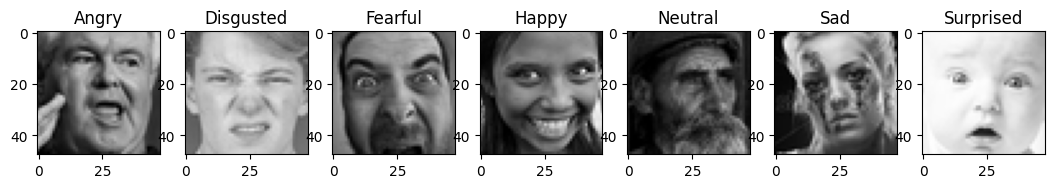

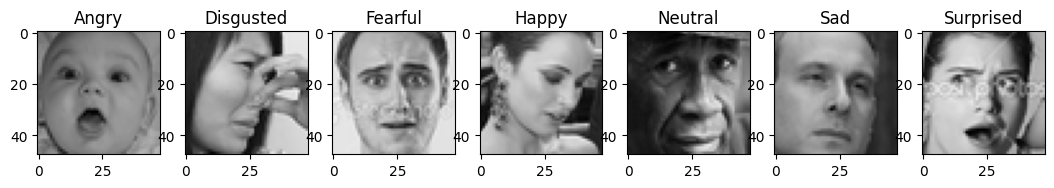

In [4]:
for i in range(5):
    img_show(train_data)

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=16,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32,activation='relu'),
    keras.layers.Dense(units=7,activation='softmax'),
])

c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,652,903 (6.31 MB)

 Trainable params: 1,652,903 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adamax',loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [8]:
hist = model.fit(train_data,epochs=100,validation_data=valid_data)

Epoch 1/100
   2/1795 ━━━━━━━━━━━━━━━━━━━━ 1:35 53ms/step - accuracy: 0.1250 - loss: 1.9325

c:\Users\Laptop Markazi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1795/1795 ━━━━━━━━━━━━━━━━━━━━ 88s 48ms/step - accuracy: 0.2410 - loss: 1.8347 - val_accuracy: 0.3891 - val_loss: 1.6527
Epoch 2/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.3659 - loss: 1.6145 - val_accuracy: 0.4384 - val_loss: 1.4569
Epoch 3/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.4238 - loss: 1.4830 - val_accuracy: 0.4641 - val_loss: 1.3798
Epoch 4/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.4707 - loss: 1.3842 - val_accuracy: 0.4986 - val_loss: 1.3199
Epoch 5/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.5114 - loss: 1.2810 - val_accuracy: 0.4897 - val_loss: 1.3332
Epoch 6/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.5589 - loss: 1.1831 - val_accuracy: 0.5202 - val_loss: 1.2717
Epoch 7/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.6056 - loss: 1.0645 - val_accuracy: 0.5252 - val_loss: 1.2812
Epoch 8/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.6604 - los

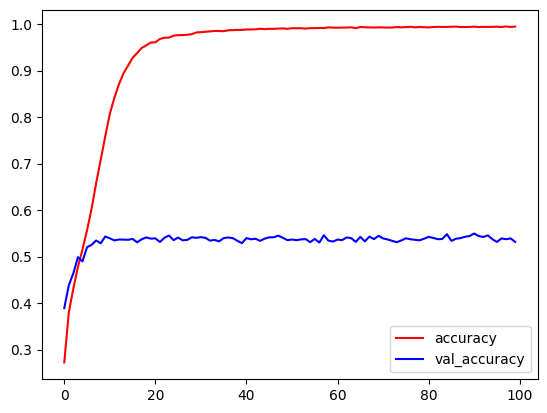

In [9]:
plt.plot(hist.history['accuracy'],color='r')
plt.plot(hist.history['val_accuracy'],color='b')
plt.legend(['accuracy','val_accuracy'])
plt.show()

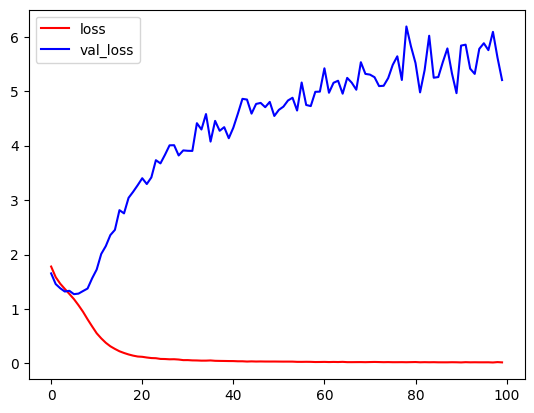

In [10]:
plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='b')
plt.legend(['loss','val_loss'])
plt.show()

In [11]:
model.save('model.h5')